# Customer Service Requests Analysis

In [373]:
#Import Library Files

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Create conversion function for correct date format

In [2]:
def dateparser(dates):
    if len(dates)==0:
        return np.NaN
    elif len(dates) >= 11 & len(dates) <= 14:
        return pd.datetime.strptime(str(dates),"%m/%d/%y %H:%M")
    else:
        return np.NaN


In [ ]:
#Load data from file (1.Import a 311 NYC service request.convert the columns ‘Created Date’ and Closed Date’ to datetime datatype format through dateparser function

In [3]:
data = pd.read_csv('311SR.csv',parse_dates=["Created Date", "Closed Date"], date_parser=dateparser,na_filter=False,index_col=False)

In [99]:
data.tail(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Requested_Date
300695,30283424,2015-03-29 00:33:00,2015-03-29 03:40:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206,162 THROOP AVENUE,...,,,,,,40.69959035,-73.94423377,"(40.69959035300927, -73.94423377144169)",187.0,03:07:00
300696,30280004,2015-03-29 00:33:00,2015-03-29 04:38:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461,3151 EAST TREMONT AVENUE,...,,,,,,40.83770759,-73.83458731,"(40.8377075854206, -73.83458731019586)",245.0,04:05:00
300697,30281825,2015-03-29 00:33:00,2015-03-29 04:41:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036,251 WEST 48 STREET,...,,,,,,40.76058323,-73.98592204,"(40.76058322950115, -73.98592204392392)",248.0,04:08:00


In [5]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
data.dropna(axis=0,subset=['Created Date','Closed Date'],inplace = True)

In [94]:
#data['Created Date'].isnull().sum()
#data['Created Date'].isnull().sum()
#ab = divmod((data['Closed Date'] - data['Created Date']).dt.total_seconds(),60)

In [93]:
# create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

<built-in method count of tuple object at 0x000001D5C5003A08>


In [8]:
data['Request_Closing_Time'] = ((data['Closed Date'] - data['Created Date']).dt.total_seconds()/60)

In [9]:
data['Requested_Date'] = data['Closed Date'] - data['Created Date']

In [10]:
data.rename(columns={'Complaint Type':'Complaint_Type'},inplace=True)

In [100]:
#data.isnull().sum()
#len(data['Created Date'][0])
major=data.loc[:,"Complaint_Type"]
major

0          Noise - Street/Sidewalk
1                 Blocked Driveway
2                 Blocked Driveway
3                  Illegal Parking
4                  Illegal Parking
5                  Illegal Parking
6                  Illegal Parking
7                 Blocked Driveway
8                  Illegal Parking
9                 Blocked Driveway
10                Blocked Driveway
11                Blocked Driveway
12         Noise - Street/Sidewalk
13                 Illegal Parking
14                Derelict Vehicle
15                Blocked Driveway
16                Blocked Driveway
17              Noise - Commercial
18              Noise - Commercial
19         Noise - Street/Sidewalk
20                 Illegal Parking
21                 Illegal Parking
22              Noise - Commercial
23                 Illegal Parking
24                Blocked Driveway
25                Blocked Driveway
26        Noise - House of Worship
27                Blocked Driveway
28                 I

In [101]:
major.unique()
major.nunique()

23

In [102]:
top=major.value_counts()
top

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint_Type, dtype: int64

In [ ]:
#major insights/patterns that you can offer in a visual format

In [103]:
#o	Plot a bar graph of count vs. complaint types
%matplotlib inline

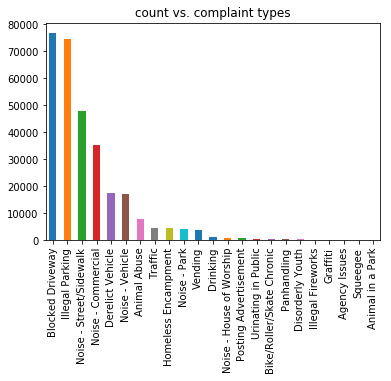

In [104]:
major.value_counts().plot(kind='bar',title='count vs. complaint types')

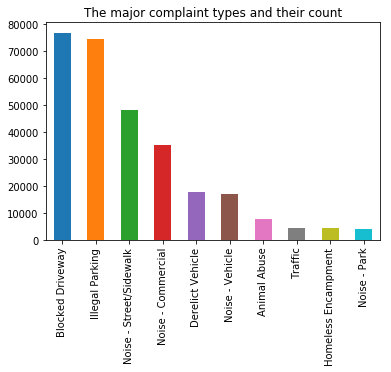

In [105]:
top.head(10).plot(kind='bar',title='The major complaint types and their count')

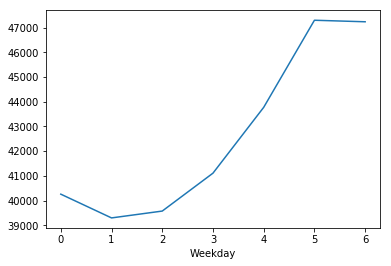

In [106]:
data["Weekday"] = data['Created Date'].apply(lambda x: x.weekday())
data.groupby('Weekday').size().plot()

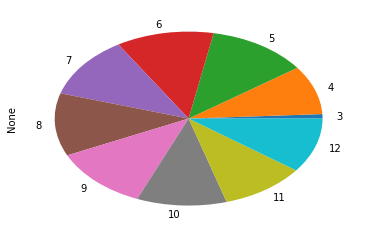

In [107]:
data['Month']=data['Created Date'].apply(lambda x: x.month)
data.groupby('Month').size()
data.groupby('Month').size().plot(kind='pie')

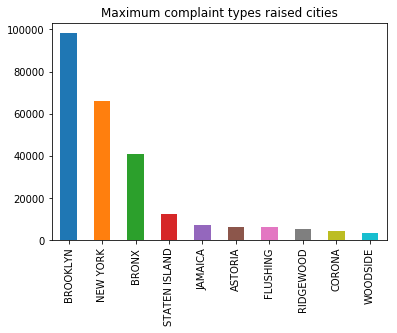

In [108]:
data['City'].value_counts().head(10).plot(kind='bar',title='Maximum complaint types raised cities')

In [11]:
df = pd.DataFrame(pd.concat((data['City'],data['Status'],data['Requested_Date'],data['Request_Closing_Time'],data['Complaint_Type']),axis=1,ignore_index=False))
df

,City,Status,Requested_Date,Request_Closing_Time,Complaint_Type
0,NEW YORK,Closed,0 days 00:56:00,56.0,Noise - Street/Sidewalk
1,ASTORIA,Closed,0 days 01:27:00,87.0,Blocked Driveway
2,BRONX,Closed,0 days 04:52:00,292.0,Blocked Driveway
3,BRONX,Closed,0 days 07:46:00,466.0,Illegal Parking
4,ELMHURST,Closed,0 days 03:28:00,208.0,Illegal Parking
5,BROOKLYN,Closed,0 days 01:54:00,114.0,Illegal Parking
6,NEW YORK,Closed,0 days 01:58:00,118.0,Illegal Parking
7,BRONX,Closed,0 days 01:48:00,108.0,Blocked Driveway
8,KEW GARDENS,Closed,0 days 08:34:00,514.0,Illegal Parking
9,BROOKLYN,Closed,0 days 01:24:00,84.0,Blocked Driveway


In [ ]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [12]:
#df.groupby(['City']).sort_values(['Status', 'Requested_Date'], ascending=[True, False])
df.dropna(axis=0, how='any', thresh=None, subset=['City'],inplace = True)
df = df[df['City']!='']
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [18]:
#df['City'].unique()
#df['City'].isnull().sum()
#df['City'].fillna("Empty", inplace = True)
grp = df.groupby('City')
#grp.get_group('ASTORIA')
for City, group in grp: 
    print(City+' City')
    print(grp.get_group(City)[['Complaint_Type','Status', 'Requested_Date']].sort_values(['Complaint_Type','Requested_Date'], ascending=[True, False]))
   

ARVERNE City
                 Complaint_Type  Status Requested_Date
102846             Animal Abuse  Closed       06:28:00
131095             Animal Abuse  Closed       05:01:00
126001             Animal Abuse  Closed       03:41:00
191012             Animal Abuse  Closed       03:32:00
130809             Animal Abuse  Closed       03:31:00
236110             Animal Abuse  Closed       03:28:00
23119              Animal Abuse  Closed       03:18:00
164831             Animal Abuse  Closed       03:17:00
97786              Animal Abuse  Closed       02:54:00
143620             Animal Abuse  Closed       02:54:00
13960              Animal Abuse  Closed       02:40:00
43154              Animal Abuse  Closed       02:34:00
262506             Animal Abuse  Closed       02:29:00
231870             Animal Abuse  Closed       02:23:00
97769              Animal Abuse  Closed       02:18:00
71185              Animal Abuse  Closed       02:08:00
215809             Animal Abuse  Closed       02:07:

                 Complaint_Type  Status  Requested_Date
141668             Animal Abuse  Closed 2 days 03:18:00
32624              Animal Abuse  Closed 0 days 01:52:00
102568         Blocked Driveway  Closed 1 days 19:48:00
130240         Blocked Driveway  Closed 1 days 05:35:00
238140         Blocked Driveway  Closed 0 days 20:13:00
54378          Blocked Driveway  Closed 0 days 14:53:00
233411         Blocked Driveway  Closed 0 days 06:39:00
276927         Blocked Driveway  Closed 0 days 05:11:00
215882         Blocked Driveway  Closed 0 days 05:10:00
75766          Blocked Driveway  Closed 0 days 04:43:00
80084          Blocked Driveway  Closed 0 days 04:11:00
14252          Blocked Driveway  Closed 0 days 03:25:00
96334          Blocked Driveway  Closed 0 days 03:15:00
291759         Blocked Driveway  Closed 0 days 02:55:00
300511         Blocked Driveway  Closed 0 days 02:16:00
126628         Blocked Driveway  Closed 0 days 02:10:00
18755          Blocked Driveway  Closed 0 days 0

               Complaint_Type  Status  Requested_Date
23882            Animal Abuse  Closed 1 days 12:02:00
36855            Animal Abuse  Closed 0 days 19:49:00
100688           Animal Abuse  Closed 0 days 12:28:00
37481            Animal Abuse  Closed 0 days 09:45:00
269928           Animal Abuse  Closed 0 days 08:38:00
81063            Animal Abuse  Closed 0 days 08:03:00
190690           Animal Abuse  Closed 0 days 07:15:00
148055           Animal Abuse  Closed 0 days 07:01:00
292029           Animal Abuse  Closed 0 days 06:36:00
219806           Animal Abuse  Closed 0 days 06:30:00
256768           Animal Abuse  Closed 0 days 05:46:00
8233             Animal Abuse  Closed 0 days 05:30:00
36367            Animal Abuse  Closed 0 days 05:25:00
117353           Animal Abuse  Closed 0 days 05:16:00
86880            Animal Abuse  Closed 0 days 04:57:00
64064            Animal Abuse  Closed 0 days 04:48:00
138024           Animal Abuse  Closed 0 days 04:46:00
254070           Animal Abus

In [494]:
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Requested_Date,Weekday,Month
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,,,,,40.86568154,-73.92350096,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,3,12
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,,,,,40.77594531,-73.91509394,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,3,12
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,,,,,40.87032452,-73.88852464,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,3,12
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,,,,,40.83599405,-73.8283794,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,3,12
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,,,,,40.73305962,-73.87416976,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,3,12
5,32306554,2015-12-31 23:56:00,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215,260 21 STREET,...,,,,,40.66082272,-73.99256786,"(40.66082272389114, -73.99256786342693)",0 days 01:54:00,3,12
6,32306559,2015-12-31 23:55:00,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032,524 WEST 169 STREET,...,,,,,40.84084759,-73.93737509,"(40.840847591440415, -73.9373750864581)",0 days 01:58:00,3,12
7,32307009,2015-12-31 23:54:00,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457,501 EAST 171 STREET,...,,,,,40.83750263,-73.90290517,"(40.83750262540012, -73.90290517326568)",0 days 01:48:00,3,12
8,32308581,2015-12-31 23:53:00,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415,83-44 LEFFERTS BOULEVARD,...,,,,,40.70497716,-73.83260475,"(40.704977164399935, -73.8326047502584)",0 days 08:34:00,3,12
9,32308391,2015-12-31 23:53:00,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219,1408 66 STREET,...,,,,,40.62379307,-73.9995389,"(40.623793065806524, -73.99953890121567)",0 days 01:24:00,3,12


In [ ]:
#print(pd.to_datetime(data["Requested_Date"]).dt.day)
#divmod(d*86400,60)[0]
#divmod(3600,60) 
#divmod(100,60) 
#data['Requested_Date'].datetime.timedelta.total_seconds()
#data['totalmins']
#t= (divmod((pd.to_datetime(data["Requested_Date"]).dt.day)*86400,60)+ divmod((pd.to_datetime(data["Requested_Date"]).dt.hour)*3600,60)+(pd.to_datetime(data["Requested_Date"]).dt.minute) + divmod((pd.to_datetime(data["Requested_Date"]).dt.second)*100,60))


In [8]:
#data.dropna(axis=0,subset=["Requested_Date"],inplace=True)

In [128]:
#data[data["Requested_Date"].isnull()].sum()

In [27]:
#data[data["Requested_Date"].notnull()].sum()
#data.drop(axis=1,columns=['daymins','hourmins','mins','secmins'],inplace = True)

In [130]:
# statistical test

In [134]:
# 1.Whether the average response time across complaint types is similar or not (overall)
#H0 :  average response time across complaint types is similar
#Ha :  average response time across complaint types is not similar

In [135]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [136]:
mod = ols('Request_Closing_Time~Complaint_Type', data=data)
mod = mod.fit() #ols ordinary least squares
aov = sm.stats.anova_lm(mod) #fitted ols model to be passed
print(aov)

                      df        sum_sq       mean_sq           F  PR(>F)
Complaint_Type      22.0  1.455091e+09  6.614048e+07  514.191582     0.0
Residual        298511.0  3.839748e+10  1.286300e+05         NaN     NaN


In [ ]:
#Conclusion
#p-value <.05 so it reject the null hypothesis.
#complaints are significantly leading to variance in average response time
#there is a significant difference between average response time across the complaints

In [ ]:
#2.Are the type of complaint or service requested and location related?
#H0: Location and compliant types are related
#Ha: Location and compliant types are not related

In [498]:
data['Complaint_Type'].value_counts().shape

(24,)

In [473]:
data['City'].value_counts().shape

(54,)

In [47]:
contigency_table = pd.crosstab(data['City'],data['Complaint_Type'], margins=True)
contigency_table

Complaint_Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
,6,11,0,5,283,171,0,8,2,0,...,26,612,54,2,1,0,3,0,7,2614
ARVERNE,0,38,0,0,35,27,2,1,0,1,...,2,29,7,1,0,0,0,1,1,220
ASTORIA,0,125,0,15,2618,351,3,35,0,4,...,61,386,204,1,1,0,47,9,54,6330
Astoria,0,0,0,0,116,12,0,0,0,0,...,0,114,0,0,0,0,0,0,0,717
BAYSIDE,0,37,0,0,377,198,1,1,0,3,...,4,15,16,0,0,0,9,0,2,1221
BELLEROSE,0,7,0,1,95,89,2,1,0,0,...,1,13,10,1,1,0,7,1,0,375
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,1,1,0,0,0,0,0,0,30
BRONX,0,1415,0,20,12755,1953,63,188,0,9,...,547,8892,3396,19,17,0,355,51,379,40702
BROOKLYN,0,2394,0,111,28148,5181,72,257,0,43,...,1555,13356,5177,49,45,0,1085,136,515,98307


In [48]:
chi_square , p_value, degrees_of_freedom, expected_frequencies=stats.chi2_contingency(contigency_table)

In [49]:
print('chi_square',round(chi_square,3))
print('p-value',p_value)

chi_square 121788.331
p-value 0.0


In [489]:
#Conclusion
#p-value <.05,so rejected null hypothesis.
#Location and compliant types are not independent of each other

0.0